In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns

df - климатические и почвенные параметры для каждого экземляра
Q - set of the ancestry fractions

In [3]:
## read all climate-soil parameters 
all_data = pd.read_csv("full_dataframes/result_k_20_climate_soil.csv")

q_names = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20"]
Q = all_data[q_names]
features =  ['bio1', 'bio2', 'bio3',
       'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10', 'bio11',
       'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19',
       'solar_min', 'solar_max', 'solar_mean', 'wind_min', 'wind_max',
       'wind_mean', 'vapr_min', 'vapr_max', 'vapr_mean', 'T_GRAVEL', 'T_SAND',
       'T_SILT', 'T_CLAY', 'T_REF_BULK_DENSITY', 'T_OC', 'T_PH_H2O',
       'T_CEC_CLAY', 'T_CEC_SOIL', 'T_BS', 'T_TEB', 'T_CACO3', 'T_CASO4',
       'T_ESP', 'T_ECE', 'S_GRAVEL', 'S_SAND', 'S_SILT', 'S_CLAY',
       'S_REF_BULK_DENSITY', 'S_OC', 'S_PH_H2O', 'S_CEC_CLAY', 'S_CEC_SOIL',
       'S_BS', 'S_TEB', 'S_CACO3', 'S_CASO4', 'S_ESP', 'S_ECE']

df = all_data[features]

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

Попробуем самую простое назначение класса векторам из Q: если максимальный элемент вектора  > 0.7, то в качества класса данного вектора берем индекс максимального элемента, иначе назначаем класс -1 (дальше не будем рассматривать такие вектора).

In [5]:
def make_label(v):
    tmp = np.argmax(v)
    return tmp if v[tmp] > 0.70 else -1

label_simple = np.apply_along_axis(make_label, 1, Q)

Оставим только тех, кто "хорошо" классифицировался

In [6]:
new_Q = Q.iloc[label_simple != -1]
label = label_simple[label_simple != -1]
data = all_data.iloc[label_simple != -1]
coordinate = data[['longitude', 'latitude']]
df = data[features]
print(len(new_Q), len(Q))


771 1048


PCA и t-SNE

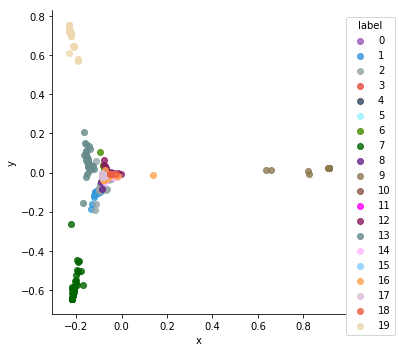

In [7]:
pca_res = pca.fit_transform(new_Q)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", 
          "#98f5ff", "#458b00", "#006400", "#68228b", "#8b7a50", "#8b5742",
         "#ff00ff","#8b1c62", "#668b8b","#ffbbff","#87ceff", "#ffa54f","#d8bfd8","#ee5c42","#eed8ae","#eeee00"]

df_pca = pd.DataFrame({'x': pca_res[:,0], 'y': pca_res[:,1],'label': label})
facet = sns.lmplot(data=df_pca, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True,  palette=sns.color_palette(flatui))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 771 samples in 0.008s...
[t-SNE] Computed neighbors for 771 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 771 / 771
[t-SNE] Mean sigma: 0.000006
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.028477
[t-SNE] Error after 300 iterations: 0.282075


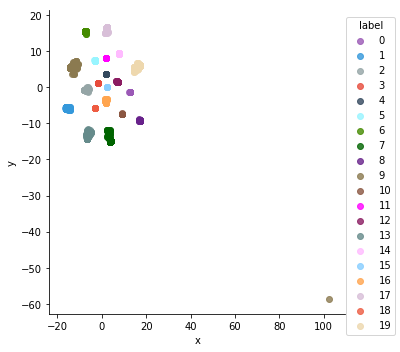

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(new_Q)
df_tsne =  pd.DataFrame({'x': tsne_results[:,0], 'y': tsne_results[:,1] ,'label': label})
facet = sns.lmplot(data=df_tsne, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True,  palette=sns.color_palette(flatui))

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=123456)

попробуем классифицировать с помощью Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
rf_clf = RandomForestClassifier(n_jobs=2, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("accuracy",accuracy)
print("r2", metrics.r2_score(y_test, y_pred_rf))
print("mean_squared_error", metrics.mean_squared_error(y_test, y_pred_rf))
print(metrics.classification_report(y_pred_rf, y_test))


accuracy 0.870967741935
r2 0.459722823733
mean_squared_error 16.0967741935
             precision    recall  f1-score   support

          0       1.00      0.50      0.67         6
          1       1.00      0.80      0.89        10
          2       0.88      0.88      0.88         8
          3       0.00      0.00      0.00         2
          4       1.00      1.00      1.00         5
          5       1.00      0.89      0.94         9
          6       1.00      1.00      1.00         8
          7       0.91      1.00      0.95        10
          8       0.91      1.00      0.95        10
          9       1.00      0.85      0.92        20
         10       1.00      1.00      1.00         5
         11       0.75      0.75      0.75         4
         12       1.00      0.88      0.93         8
         13       1.00      0.92      0.96        12
         14       0.50      1.00      0.67         4
         15       0.00      0.00      0.00         2
         16       0.45 

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


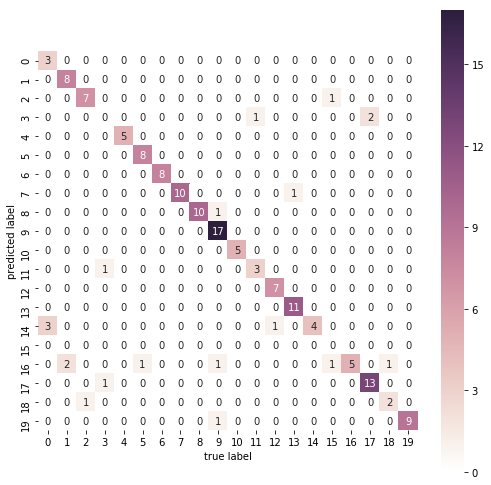

In [30]:
mat_rf = confusion_matrix(y_test, y_pred_rf)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, sub = plt.subplots(1, 1)
fig.set_size_inches(8.5, 8.5)
sns.heatmap(mat_rf, square=True, cmap=cmap, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

Потом пригодится, чтобы отсеить неважные параметры.

In [32]:
rf_clf_10 = RandomForestClassifier(n_jobs=2, random_state=0, max_depth=10)
rf_clf_10.fit(X_train, y_train)
print(sorted(zip(map(lambda x: round(x, 4), rf_clf_10.feature_importances_), features), 
             reverse=True))

[(0.074499999999999997, 'bio11'), (0.064899999999999999, 'vapr_min'), (0.056599999999999998, 'solar_min'), (0.052200000000000003, 'bio4'), (0.048399999999999999, 'solar_max'), (0.042599999999999999, 'bio18'), (0.042299999999999997, 'bio6'), (0.034500000000000003, 'bio7'), (0.034299999999999997, 'wind_mean'), (0.028899999999999999, 'solar_mean'), (0.0287, 'wind_min'), (0.028000000000000001, 'bio5'), (0.026100000000000002, 'bio14'), (0.026100000000000002, 'bio12'), (0.0246, 'bio19'), (0.0246, 'bio1'), (0.024299999999999999, 'bio9'), (0.023099999999999999, 'bio3'), (0.021299999999999999, 'vapr_mean'), (0.019599999999999999, 'T_GRAVEL'), (0.0195, 'wind_max'), (0.0184, 'bio8'), (0.017299999999999999, 'T_BS'), (0.014800000000000001, 'bio10'), (0.014800000000000001, 'T_CEC_SOIL'), (0.0146, 'vapr_max'), (0.0141, 'S_OC'), (0.0099000000000000008, 'bio2'), (0.0097999999999999997, 'bio16'), (0.0097999999999999997, 'T_OC'), (0.0095999999999999992, 'S_BS'), (0.0089999999999999993, 'S_CACO3'), (0.008

Попробуем изменить способ назначать классы для векторов из Q: наивный метод + knn для -1 класса

In [33]:
from sklearn.neighbors import KNeighborsClassifier
not_class_data  = Q.loc[label_simple == -1]
class_data = Q.loc[label_simple != -1]
class_label = label_simple[label_simple != -1]
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(class_data,class_label )
label_knn = np.arange(label_simple.shape[0])
label_knn[label_simple != -1] = label_simple[label_simple != -1]
label_knn[label_simple == -1] = neigh.predict(not_class_data)

посмотрим как новыее классы выглядят на PCA и t-SNE

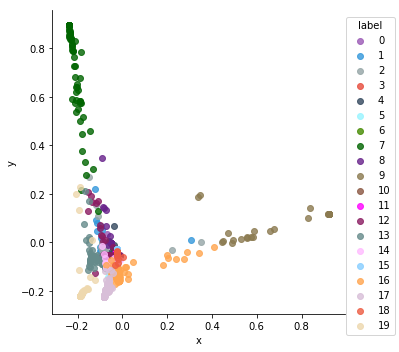

In [34]:
pca_res = pca.fit_transform(Q)
df_pca = pd.DataFrame({'x': pca_res[:,0], 'y': pca_res[:,1],'label': label_knn})
facet = sns.lmplot(data=df_pca, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True,  palette=sns.color_palette(flatui))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1048 samples in 0.002s...
[t-SNE] Computed neighbors for 1048 samples in 0.070s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1048
[t-SNE] Computed conditional probabilities for sample 1048 / 1048
[t-SNE] Mean sigma: 0.000008
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.658344
[t-SNE] Error after 300 iterations: 0.401278


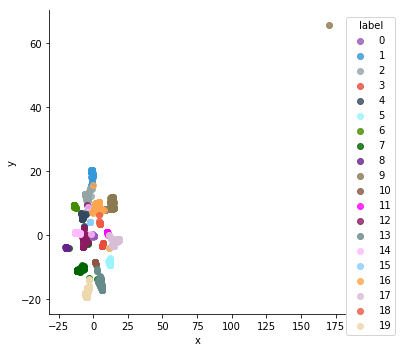

In [35]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(Q)
df_tsne = pd.DataFrame({'x': tsne_results[:,0], 'y': tsne_results[:,1] ,'label': label_knn})
facet = sns.lmplot(data=df_tsne, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True,  palette=sns.color_palette(flatui))

теперь попробуем на этом наш классификатор random forest

In [36]:
old_df = all_data[features]

In [37]:
X_train_k, X_test_val, y_train_k, y_test_val = train_test_split(old_df, label_knn, test_size=0.3, random_state=123456)
X_test_k, X_val_k, y_test_k, y_val_k = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=123456)

In [38]:
from sklearn import metrics
rf_clf_knn = RandomForestClassifier(n_jobs=2, random_state=34)
rf_clf_knn.fit(X_train_k, y_train_k)
y_pred_knn = rf_clf_knn.predict(X_test_k)

accuracy = metrics.accuracy_score(y_test_k, y_pred_knn)
print("accuracy",accuracy)
print("r2", metrics.r2_score(y_test_k, y_pred_knn))
print(metrics.classification_report(y_test_k, y_pred_knn))

accuracy 0.821656050955
r2 0.360170985594
             precision    recall  f1-score   support

          0       0.67      0.67      0.67         3
          1       1.00      0.85      0.92        13
          2       0.62      0.73      0.67        11
          3       0.20      0.50      0.29         2
          4       0.83      0.83      0.83         6
          5       0.80      1.00      0.89         4
          6       0.90      1.00      0.95         9
          7       0.83      0.77      0.80        13
          8       0.71      1.00      0.83         5
          9       0.88      0.93      0.90        15
         10       1.00      1.00      1.00         2
         11       1.00      0.71      0.83         7
         12       1.00      0.93      0.96        14
         13       0.90      0.82      0.86        11
         14       0.75      0.75      0.75         4
         15       0.00      0.00      0.00         1
         16       0.70      0.50      0.58        14
   

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


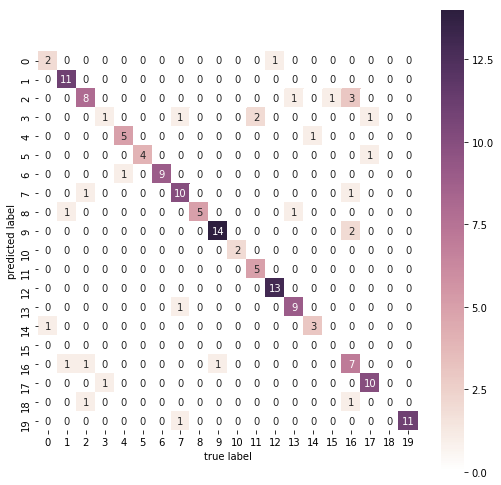

In [39]:
mat_rf_knn = confusion_matrix(y_test_k, y_pred_knn)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, sub = plt.subplots(1, 1)
fig.set_size_inches(8.5, 8.5)
sns.heatmap(mat_rf_knn.T, square=True, cmap=cmap, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

попробуем класстеризовать вектора из Q, на tsne можно заметить, что там меньше чем 20 кластеров

In [41]:
from sklearn.cluster import KMeans
label_kmean = KMeans(n_clusters=12, random_state=2).fit_predict(Q)

In [42]:
# from sklearn.cluster import AffinityPropagation
# af = AffinityPropagation(preference=-19).fit(Q)
# cluster_centers_indices = af.cluster_centers_indices_
# labels_af = af.labels_

# n_clusters_ = len(cluster_centers_indices)
# print(np.unique(af.labels_))
# print(n_clusters_)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1048 samples in 0.003s...
[t-SNE] Computed neighbors for 1048 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1048
[t-SNE] Computed conditional probabilities for sample 1048 / 1048
[t-SNE] Mean sigma: 0.000008
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.960793
[t-SNE] Error after 300 iterations: 0.330219


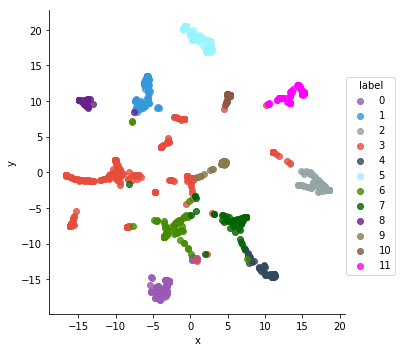

In [44]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(Q)
df_tsne = pd.DataFrame({'x': tsne_results[:,0], 'y': tsne_results[:,1] ,'label': label_kmean})
facet = sns.lmplot(data=df_tsne, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True,  palette=sns.color_palette(flatui))

In [46]:
X_train_k12, X_val, y_train_k12, y_val = train_test_split(old_df, label_kmean, test_size=0.3, random_state=123456)
X_train_k12, X_test_k12, y_train_k12, y_test_k12 = train_test_split(X_val, y_val, test_size=0.5, random_state=123456)

In [47]:
rf_clf_k12 = RandomForestClassifier(n_jobs=2, random_state=34)
rf_clf_k12.fit(X_train_k12, y_train_k12)
y_pred_k12 = rf_clf_k12.predict(X_test_k12)

accuracy = accuracy_score(y_test_k12, y_pred_k12)
print("accuracy", accuracy)
print('r2', metrics.r2_score(y_test_k12, y_pred_k12))
print(metrics.classification_report(y_pred_k12, y_test_k12))

accuracy 0.689873417722
r2 0.659853383699
             precision    recall  f1-score   support

          0       0.90      0.82      0.86        11
          1       0.69      0.69      0.69        13
          2       0.83      0.59      0.69        17
          3       0.71      0.78      0.74        46
          4       0.86      0.60      0.71        10
          5       0.80      0.62      0.70        13
          6       0.40      0.43      0.41        14
          7       0.29      0.25      0.27         8
          8       0.12      1.00      0.22         1
          9       1.00      0.86      0.92         7
         10       0.83      0.71      0.77         7
         11       0.85      1.00      0.92        11

avg / total       0.73      0.69      0.70       158



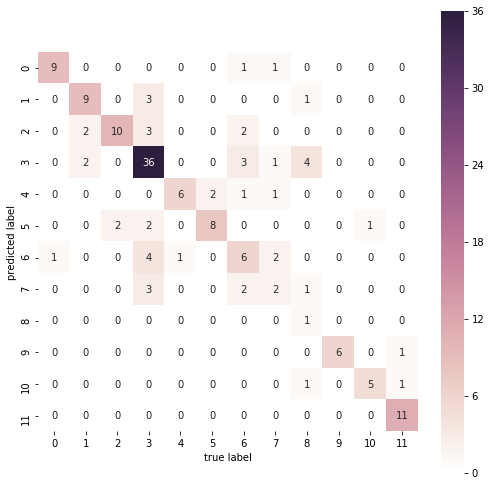

In [48]:
mat_rf_k12 = confusion_matrix(y_test_k12, y_pred_k12)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, sub = plt.subplots(1, 1)
fig.set_size_inches(8.5, 8.5)
sns.heatmap(mat_rf_k12.T, square=True, cmap=cmap, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

Сначала попробуем простую линейную регрессию на "отфильрованных" данных

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = np.round(regr.predict(X_test))

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


R2_score: 0.496535296665
mean_squared_error: 15.0
accuracy: 0.187096774194
             precision    recall  f1-score   support

       -0.0       0.00      0.00      0.00         2
        1.0       0.00      0.00      0.00         0
        2.0       0.00      0.00      0.00         1
        3.0       0.00      0.00      0.00         1
        4.0       0.00      0.00      0.00         9
        5.0       0.12      0.07      0.09        14
        6.0       0.38      0.43      0.40         7
        7.0       0.27      0.21      0.24        14
        8.0       0.91      0.37      0.53        27
        9.0       0.18      0.27      0.21        11
       10.0       0.60      0.18      0.27        17
       11.0       0.00      0.00      0.00        11
       12.0       0.00      0.00      0.00         8
       13.0       0.18      0.25      0.21         8
       14.0       0.00      0.00      0.00         4
       15.0       0.00      0.00      0.00         9
       16.0       0.00 

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


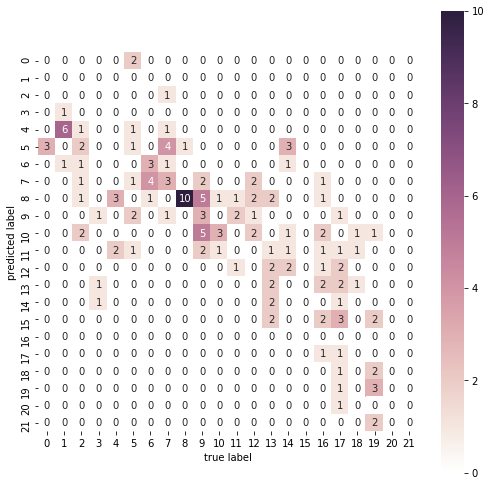

In [50]:
from sklearn import metrics
print("R2_score:", r2_score(y_test,y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)
print(metrics.classification_report(y_pred, y_test))
mat_knn = confusion_matrix(y_test, y_pred)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, sub = plt.subplots(1, 1)
fig.set_size_inches(8.5, 8.5)
sns.heatmap(mat_knn.T, square=True, cmap=cmap, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

не очень хороший результат, попробуем использовать полиномиальную  регрессию, 

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# create a Linear Regressor   
lin_regressor = LinearRegression()

# pass the order of your polynomial here  
poly = PolynomialFeatures(2)

# convert to be used further to linear regression
X_transform_knn = poly.fit_transform(X_train)
X_test_knn_tr = poly.fit_transform(X_test)
y_pred = 
# fit this to Linear Regressor
print("R2_score:", r2_score(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)
print(metrics.classification_report(y_pred_knn, y_test))
mat_knn = confusion_matrix(y_test, y_pred)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, sub = plt.subplots(1, 1)
fig.set_size_inches(8.5, 8.5)
sns.heatmap(mat_knn.T, square=True, cmap=cmap, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

NameError: name 'X_train_knn' is not defined

увеличение признаков не очень разумная идея

Предсказывает не очень, но можно с помощью Lasso вытащить "важные" признаки

In [85]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train_knn, y_train_knn)
lasso = linear_model.Lasso(max_iter=10000, normalize=True)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train_knn, y_train_knn)
print(pd.Series(lasso.coef_, index=X_train_knn.columns))

index =  np.argsort(np.abs(lasso.coef_[np.abs(lasso.coef_) != 0]))[::-1]
X_train_knn.columns[index]

bio1                  0.000000
bio2                 -0.106393
bio3                  0.530100
bio4                  0.001189
bio5                 -0.000000
bio6                 -0.029276
bio7                  0.000000
bio8                 -0.033806
bio9                  0.005075
bio10                 0.000000
bio11                -0.000000
bio12                 0.000000
bio13                 0.015713
bio14                 0.000000
bio15                -0.063824
bio16                 0.001476
bio17                 0.000000
bio18                -0.032114
bio19                -0.007152
solar_min            -0.000965
solar_max             0.000289
solar_mean            0.000487
wind_min             -3.260823
wind_max              2.751699
wind_mean            -0.365830
vapr_min              0.000000
vapr_max              5.182533
vapr_mean             0.000000
T_GRAVEL             -0.158395
T_SAND                0.000000
T_SILT               -0.432052
T_CLAY                0.000000
T_REF_BU

Index(['T_BS', 'bio18', 'vapr_max', 'bio15', 'bio16', 'T_OC',
       'T_REF_BULK_DENSITY', 'T_GRAVEL', 'T_SILT', 'bio2', 'solar_min',
       'bio17', 'bio19', 'bio1', 'T_TEB', 'T_CLAY', 'wind_mean', 'vapr_mean',
       'vapr_min', 'bio8', 'T_SAND', 'T_CEC_CLAY', 'solar_max', 'wind_min',
       'bio5', 'bio10', 'bio4', 'wind_max', 'T_CEC_SOIL', 'bio7', 'solar_mean',
       'T_PH_H2O', 'bio11', 'bio6', 'bio9', 'bio3', 'bio12', 'bio14', 'bio13'],
      dtype='object')

попробуем тоже самое для датасета  k_means

In [31]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train_k12, y_train_k12)
lasso = linear_model.Lasso(max_iter=10000, normalize=True)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train_k12, y_train_k12)
pred_lasso = np.round(lasso.predict(X_test_k12))
# print(pd.Series(lasso.coef_, index=X_train_knn.columns))
print("R2_score:", r2_score(y_test_k12,pred_lasso))
accuracy = accuracy_score(y_test_k12, pred_lasso)
print("accuracy:", accuracy)
print("feature with not null coeff")
index =  np.argsort(np.abs(lasso.coef_[np.abs(lasso.coef_) != 0]))[::-1]
X_train_knn.columns[index]

R2_score: 0.215386708496
accuracy: 0.183544303797
feature with not null coeff


Index(['bio15', 'bio10', 'bio12', 'bio9', 'solar_mean', 'bio17', 'bio14',
       'bio4', 'bio5', 'solar_max', 'bio19', 'solar_min', 'bio16', 'bio11',
       'bio6', 'bio13', 'bio18', 'bio2', 'bio3', 'bio1', 'bio8', 'bio7'],
      dtype='object')

Попробуем NaiveBaise

R2_score: 0.509379601767
accuracy: 0.645569620253
             precision    recall  f1-score   support

          0       0.80      0.89      0.84         9
          1       0.62      0.62      0.62        13
          2       0.83      0.53      0.65        19
          3       0.69      0.88      0.77        40
          4       0.57      0.67      0.62         6
          5       0.80      0.42      0.55        19
          6       0.33      0.24      0.28        21
          7       0.43      0.33      0.38         9
          8       0.12      0.50      0.20         2
          9       1.00      1.00      1.00         6
         10       0.83      1.00      0.91         5
         11       0.69      1.00      0.82         9

avg / total       0.66      0.65      0.63       158



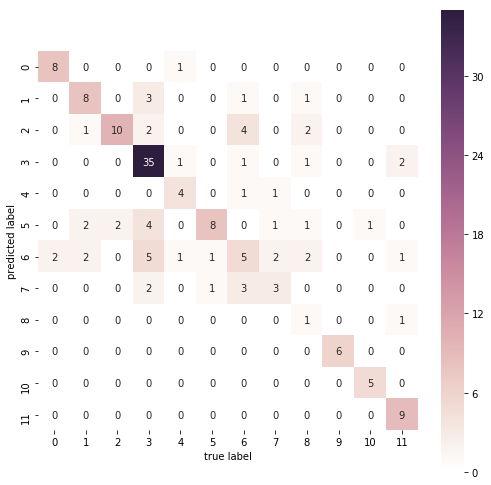

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train_k12, y_train_k12).predict(X_test_k12)
print("R2_score:", r2_score(y_test_k12,y_pred_nb))
accuracy = accuracy_score(y_test_k12, y_pred_nb)
print("accuracy:", accuracy)
print(metrics.classification_report(y_pred_nb, y_test_k12))
mat_knn = confusion_matrix(y_test_k12, y_pred_nb)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, sub = plt.subplots(1, 1)
fig.set_size_inches(8.5, 8.5)
sns.heatmap(mat_knn.T, square=True, cmap=cmap, annot=True, fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [24]:
from sklearn.svm import SVC
clf = SVC( kernel = 'poly', degree=2)
clf.fit(X_train, y_train)
pred_svm = clf.predict(X_test)
print("R2_score:", metrics.r2_score(y_test,pred_svm))
accuracy = accuracy_score(y_test, pred_svm)
print("accuracy:", accuracy)

R2_score: 0.39692507579
accuracy: 0.845161290323


In [1]:
print(1)

1
